In [ ]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("out.csv")

In [ ]:
df.head()

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,...,SPREGOUT_11,SPREGOUT_12,SPREGOUT_13,SPREGOUT_14,SPREGOUT_15,SPREGOUT_16,SPREGOUT_17,SPREGOUT_18,SPREGOUT_19,SPREGOUT_20
0,00010001 2,PH7,1.0,1.0,2.0,1.0,361799.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010001 7,PH7,1.0,1.0,7.0,1.0,361799.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00010002 4,PH7,1.0,2.0,4.0,1.0,361799.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00010004 2,PH7,1.0,4.0,2.0,1.0,361799.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00010007 2,PH7,1.0,7.0,2.0,1.0,361799.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(25074, 5834)

In [ ]:
df=df[["V012","S109","V130","V225","V312","V3A02","V3A06","S812B","V739","V746","V743A","V743B","V745A","V745B","V744A","V850A","V850B","D101A","D110A","D110F","D125","S1229BA","V761"]]
df.columns=['age','education','religion','wantedPregnancy','methodUsed','knowsSideEffects','talkFamilyPlanning','mainReasonNotTo','decideMoney','earnMore','decideHealth','decidePurchase','ownHouse','ownLand','hitWife','canSayNo','canCondom','paranoidHusband','abused','depressed','raped','knowsLaws','useContraceptive']
df = df.fillna(-1)
df = df[(df.useContraceptive != -1)&(df.useContraceptive != 8)]

In [ ]:
df[(df.methodUsed != 0)].shape

(8143, 23)

In [ ]:
df[(df.knowsSideEffects != -1)].shape

(5900, 23)

In [ ]:
df[(df.talkFamilyPlanning != -1)].shape

(4056, 23)

In [ ]:
#11 = not married
df[(df.mainReasonNotTo != -1)].shape

(4446, 23)

In [ ]:
df[(df.decideMoney != -1)].shape

(6263, 23)

In [ ]:
df[(df.earnMore != -1)].shape

(6263, 23)

In [ ]:
df[(df.wantedPregnancy != -1)].shape

(1005, 23)

In [ ]:
df[(df.decideHealth != -1)].shape

(14649, 23)

In [ ]:
df[(df.decidePurchase != -1)].shape

(14649, 23)

In [ ]:
df[(df.canSayNo != -1)].shape

(14649, 23)

In [ ]:
df[(df.canCondom != -1)].shape

(14649, 23)

In [ ]:
df[(df.abused != -1)].shape

(1459, 23)

In [ ]:
df[(df.depressed != -1)].shape

(1459, 23)

In [ ]:
df[(df.useContraceptive != -1)].shape

(15396, 23)

In [ ]:
df.shape

(15396, 23)

In [ ]:
df=df[['age','education','religion','wantedPregnancy','methodUsed','knowsSideEffects','talkFamilyPlanning','mainReasonNotTo','decideMoney','earnMore','decideHealth','decidePurchase','ownHouse','ownLand','hitWife','canSayNo','canCondom','paranoidHusband','abused','depressed','raped','knowsLaws','useContraceptive']]

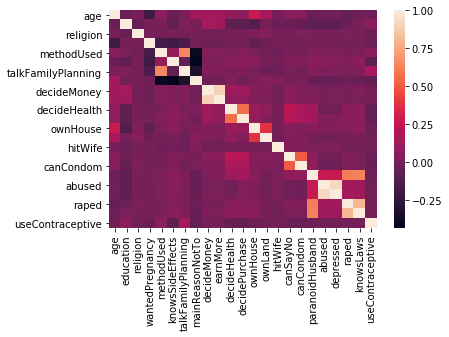

In [ ]:
#create a heatmap to determine higher correlations
sns.heatmap(df[['age','education','religion','wantedPregnancy','methodUsed','knowsSideEffects','talkFamilyPlanning','mainReasonNotTo','decideMoney','earnMore','decideHealth','decidePurchase','ownHouse','ownLand','hitWife','canSayNo','canCondom','paranoidHusband','abused','depressed','raped','knowsLaws','useContraceptive']].corr())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#create a logistic model that determines if a woman would use contraceptives 
X = df[['age','education','ownLand','methodUsed','knowsSideEffects','talkFamilyPlanning','decideHealth','decidePurchase','canSayNo','canCondom','paranoidHusband','abused','depressed','raped','knowsLaws']]
y = df["useContraceptive"] ==1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


#train a logistic regression with weighted classes
logistic_model = LogisticRegression(random_state=0, class_weight='balanced')
logistic_model.fit(X, df["useContraceptive"])
predictions = logistic_model.predict(X)
df["pred"] = predictions

In [ ]:
prob =[x[1] for x in logistic_model.predict_proba(X)]

#how likely a woman will be using contraceptives
df["prob"] = prob
df[["prob","pred","useContraceptive"]]

,prob,pred,useContraceptive
0,0.836509,1.0,0.0
2,0.397786,0.0,0.0
4,0.124636,0.0,0.0
5,0.046997,0.0,0.0
6,0.042869,0.0,0.0
7,0.019589,0.0,0.0
10,0.741030,1.0,0.0
11,0.290109,0.0,0.0
14,0.233692,0.0,0.0
15,0.442588,0.0,0.0


In [ ]:
accuracy = metrics.accuracy_score(predictions,df["useContraceptive"])
print(accuracy)

0.7941673161860223


In [ ]:
#from the dataframe, get the number of rows where useContraceptive==1
uc = df.loc[df['useContraceptive']==1].shape[0]
nuc = df.loc[df['useContraceptive']==0].shape[0]
#from the dataframe, get the number of rows 

#from the dataframe, get the number of correct predictions
puc = df.loc[(df['useContraceptive']==1)&(df['pred']==1)].shape[0]
pnuc = df.loc[(df['useContraceptive']==0)&(df['pred']==0)].shape[0]

print(uc, "women will actually use contraceptives.")
print(puc,"of these are correctly predicted to use contraceptives.")
print(nuc,"women will actually not use contraceptives.")
print(pnuc,"of these are correctly predicted to not use contraceptives.")

334 women will actually use contraceptives.
258 of these are correctly predicted to use contraceptives.
15062 women will actually not use contraceptives.
11969 of these are correctly predicted to not use contraceptives.


In [ ]:
logistic_model.coef_

array([[-0.02059535,  0.01536557, -0.03959132, -0.02828106, -0.67516389,
         1.33687266, -0.0064335 , -0.2231623 , -0.04230329, -0.20454745,
        -0.08039423,  0.76742794, -0.91969266,  0.08750184, -0.01436687]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["useContraceptive"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


In [ ]:
train_accuracy

0.9766132524902555

In [ ]:
test_accuracy

0.9782891074410837